# Aviation Accidents Analysis

You are part of a consulting firm that is tasked to do an analysis of commercial and passenger jet airline safety. The client (an airline/airplane insurer) is interested in knowing what types of aircraft (makes/models) exhibit low rates of total destruction and low likelihood of fatal or serious passenger injuries in the event of an accident. They are also interested in any general variables/conditions that might be at play. Your analysis will be based off of aviation accident data accumulated from the years 1948-2023. 

Our client is only interested in airplane makes/models that are professional builds and could potentially still be active. Assume a max lifetime of 40 years for a make/model retirement and make sure to filter your data accordingly (i.e. from 1983 onwards). They would also like separate recommendations for small aircraft vs. larger passenger models. **In addition, make sure that claims that you make are statistically robust and that you have enough samples when making comparisons between groups.**


In this summative assessment you will demonstrate your ability to:
- Use Pandas to load, inspect, and clean the dataset appropriately. 
- Transform relevant columns to create measures that address the problem at hand.
- **conduct EDA: visualization and statistical measures to understand the structure of the data**
- **recommend a set of manufacturers to consider as well as specific airplanes conforming to the client's request**
- **discuss the relationship between serious injuries/airplane damage incurred and at least *two* factors at play in the incident. You must provide supporting evidence (visuals, summary statistics, tables) for each claim you make.**

In [1]:
# loading relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Exploratory Data Analysis  
- Load in the cleaned data

In [2]:
df = pd.read_csv('AviationData_cleaned.csv', encoding='latin1', low_memory=False)
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Year,TOTAL_Passengers,TOTAL_bad_Injuries,Bad_Injuries_Rate
0,20001214X42331,Accident,ATL83FA140,1983-03-20,"CROSSVILLE, TN",United States,NaN,NaN,NaN,NaN,...,0.0,0.0,IMC,Cruise,Probable Cause,02-05-2011,1983,2.0,2.0,1.000000
1,20001214X42672,Accident,FTW83LA177,1983-04-02,"MCKINNEY, TX",United States,NaN,NaN,TX05,AERO COUNTRY,...,0.0,4.0,VMC,Standing,Probable Cause,17-10-2016,1983,5.0,1.0,0.200000
2,20001214X44100,Accident,DCA83AA036,1983-08-21,"SILVANA, WA",United States,NaN,NaN,S88,NaN,...,0.0,13.0,VMC,Other,Probable Cause,17-10-2016,1983,26.0,13.0,0.500000
3,20001214X44944,Accident,NYC84LA015,1983-10-28,"MIDDLETOWN, PA",United States,NaN,NaN,NaN,NaN,...,0.0,29.0,VMC,Climb,Probable Cause,09-12-2011,1983,30.0,1.0,0.033333
4,20001214X45188,Accident,NYC84LA028,1983-11-13,"MARTHA'S VINEYARD, MA",United States,NaN,NaN,NaN,NaN,...,0.0,1.0,VMC,Climb,Probable Cause,05-05-2011,1983,1.0,0.0,0.000000


## Explore safety metrics across models/makes
- Remember that the client is interested in separate recommendations for smaller airplanes and larger airplanes. Choose a passenger threshold of 20 and separate the plane types. 

In [3]:
df['Size'] = df['TOTAL_Passengers'].apply(lambda x: 'Large' if x >= 20 else 'Small')
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Year,TOTAL_Passengers,TOTAL_bad_Injuries,Bad_Injuries_Rate,Size
0,20001214X42331,Accident,ATL83FA140,1983-03-20,"CROSSVILLE, TN",United States,NaN,NaN,NaN,NaN,...,0.0,IMC,Cruise,Probable Cause,02-05-2011,1983,2.0,2.0,1.000000,Small
1,20001214X42672,Accident,FTW83LA177,1983-04-02,"MCKINNEY, TX",United States,NaN,NaN,TX05,AERO COUNTRY,...,4.0,VMC,Standing,Probable Cause,17-10-2016,1983,5.0,1.0,0.200000,Small
2,20001214X44100,Accident,DCA83AA036,1983-08-21,"SILVANA, WA",United States,NaN,NaN,S88,NaN,...,13.0,VMC,Other,Probable Cause,17-10-2016,1983,26.0,13.0,0.500000,Large
3,20001214X44944,Accident,NYC84LA015,1983-10-28,"MIDDLETOWN, PA",United States,NaN,NaN,NaN,NaN,...,29.0,VMC,Climb,Probable Cause,09-12-2011,1983,30.0,1.0,0.033333,Large
4,20001214X45188,Accident,NYC84LA028,1983-11-13,"MARTHA'S VINEYARD, MA",United States,NaN,NaN,NaN,NaN,...,1.0,VMC,Climb,Probable Cause,05-05-2011,1983,1.0,0.0,0.000000,Small


In [4]:
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date', 'Year', 'TOTAL_Passengers', 'TOTAL_bad_Injuries',
       'Bad_Injuries_Rate', 'Size'],
      dtype='object')

#### Analyzing Makes

Explore the human injury risk profile for small and larger Makes:
- choose the 15 makes for each group possessing the lowest mean fatal/seriously injured fraction
- plot the mean fatal/seriously injured fraction for each of these subgroups side-by-side

In [5]:
df.groupby(['Size', 'Make'])['Bad_Injuries_Rate'].mean().reset_index()

,Size,Make,Bad_Injuries_Rate
0,Large,AIRBUS,0.148224
1,Large,AIRBUS INDUSTRIE,0.009099
2,Large,ANTONOV,1.000000
3,Large,Aerospatiale,0.024390
4,Large,Airbus,0.201493
...,...,...,...
1240,Small,Zenair,0.000000
1241,Small,Zlin,0.000000
1242,Small,Zlin Aviation,0.000000
1243,Small,Zodiac,0.500000


## Small Size - Analysis

In [6]:
df[(df['Size'] == 'Small') & (df['Bad_Injuries_Rate'].notna())].shape[0]

17574

In [7]:
# 267 / 17574 Small Airplanes had 100% rate of fatal/serious injuries 1.5%
make_small_mean = (
    df[df['Size'] == 'Small']
    .groupby(['Size', 'Make'])['Bad_Injuries_Rate']
    .mean()
    .reset_index()
    .dropna(subset=['Bad_Injuries_Rate'])
    .sort_values(by='Bad_Injuries_Rate', ascending=False)
)

make_small_mean[make_small_mean['Bad_Injuries_Rate'] == 1]
#make_small_mean

,Size,Make,Bad_Injuries_Rate
0,Small,177MF LLC,1.0
192,Small,BUCKER JUNGMEISTER,1.0
827,Small,North Wing,1.0
1020,Small,SLINGSBY,1.0
1021,Small,SLIP STREAM,1.0
...,...,...,...
100,Small,Aerostar Aircraft Corporation,1.0
515,Small,Focke-Wulf,1.0
81,Small,AVIONS ROBIN,1.0
1118,Small,UNIVAIR AIRCRAFT CORPORATION,1.0


## Large Size - Analysis

In [8]:
df[(df['Size'] == 'Large') & (df['Bad_Injuries_Rate'].notna())].shape[0]

373

In [9]:
# 3 / 373 Large Airplanes had 100% rate of fatal/serious injuries <1%
make_small_mean = (
    df[df['Size'] == 'Large']
    .groupby(['Size', 'Make'])['Bad_Injuries_Rate']
    .mean()
    .reset_index()
    .dropna(subset=['Bad_Injuries_Rate'])
    .sort_values(by='Bad_Injuries_Rate', ascending=False)
)

make_small_mean[make_small_mean['Bad_Injuries_Rate'] == 1]
#make_small_mean

,Size,Make,Bad_Injuries_Rate
13,Large,Beech,1.0
2,Large,ANTONOV,1.0
8,Large,BEECH,1.0


In [10]:
make_small_mean.head(15)

,Size,Make,Bad_Injuries_Rate
13,Large,Beech,1.000000
2,Large,ANTONOV,1.000000
8,Large,BEECH,1.000000
38,Large,SUKHOI,0.756250
28,Large,Fokker,0.660253
27,Large,Fairchild,0.520833
21,Large,De Havilland,0.254150
4,Large,Airbus,0.201493
26,Large,Embraer,0.185966
14,Large,Boeing,0.157252


In [11]:
df[(df['Size'] == 'Large')]['Bad_Injuries_Rate'].mean()

0.13385820767137233

**Distribution of injury rates: small makes**

Use a violinplot to look at the distribution of the fraction of passengers serious/fatally injured for small airplane makes. Just display makes with the ten lowest mean serious/fatal injury rates.

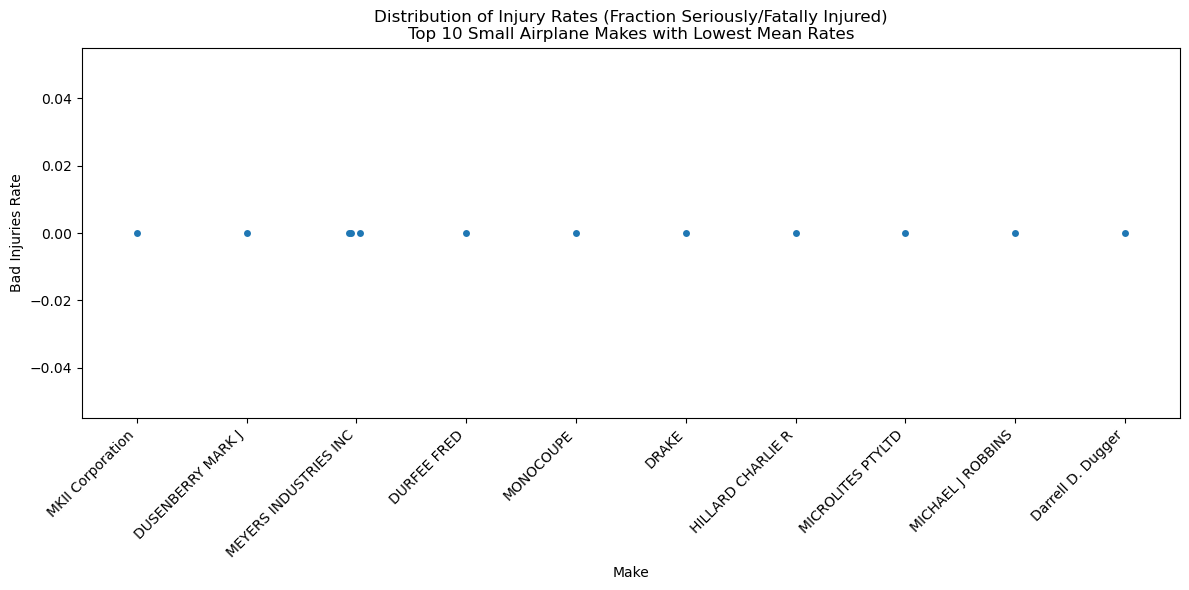

In [12]:
small_planes = df[(df['Size'].str.strip().str.lower() == 'small') & (df['Bad_Injuries_Rate'].notna())]

lowest_10_makes = (
    small_planes.groupby('Make')['Bad_Injuries_Rate']
    .mean()
    .sort_values()
    .head(10)
    .index
)

filtered_small_planes = small_planes[small_planes['Make'].isin(lowest_10_makes)]

plt.figure(figsize=(12, 6))
sns.stripplot(data=filtered_small_planes, x='Make', y='Bad_Injuries_Rate', jitter=True)
plt.title('Distribution of Injury Rates (Fraction Seriously/Fatally Injured)\nTop 10 Small Airplane Makes with Lowest Mean Rates')
plt.xlabel('Make')
plt.ylabel('Bad Injuries Rate')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


**Distribution of injury rates: large makes**

Use a stripplot to look at the distribution of the fraction of passengers serious/fatally injured for large airplane makes. Just display makes with the ten lowest mean serious/fatal injury rates.

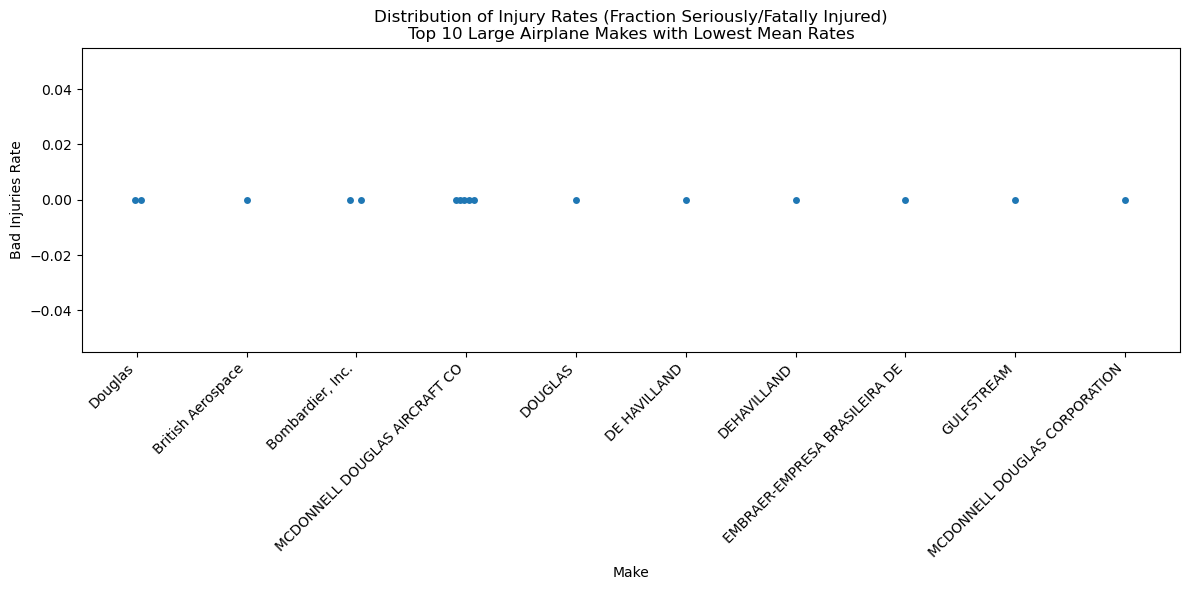

In [13]:
# Filter for large airplanes with non-null injury rates
large_planes = df[(df['Size'].str.strip().str.lower() == 'large') & (df['Bad_Injuries_Rate'].notna())]

# Compute mean injury rate per make
lowest_10_makes = (
    large_planes.groupby('Make')['Bad_Injuries_Rate']
    .mean()
    .sort_values()
    .head(10)
    .index
)

# Filter only the 10 lowest injury rate makes
filtered_large_planes = large_planes[large_planes['Make'].isin(lowest_10_makes)]

# Plot stripplot
plt.figure(figsize=(12, 6))
sns.stripplot(data=filtered_large_planes, x='Make', y='Bad_Injuries_Rate', jitter=True)
plt.title('Distribution of Injury Rates (Fraction Seriously/Fatally Injured)\nTop 10 Large Airplane Makes with Lowest Mean Rates')
plt.xlabel('Make')
plt.ylabel('Bad Injuries Rate')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### 13 Makes has 0 rate, it means no fatal/serious injury in any crash, so I give you the list of the 13 plus a chart with the top 10 non-cero rate

In [14]:
zero_injury_means = (
    df[(df['Size'].str.strip().str.lower() == 'large') & (df['Bad_Injuries_Rate'].notna())]
    .groupby('Make')['Bad_Injuries_Rate']
    .mean()
    .reset_index()
    .query("Bad_Injuries_Rate == 0")
)

zero_injury_means

,Make,Bad_Injuries_Rate
7,BAE,0.0
16,"Bombardier, Inc.",0.0
17,British Aerospace,0.0
18,DE HAVILLAND,0.0
19,DEHAVILLAND,0.0
20,DOUGLAS,0.0
22,Douglas,0.0
25,EMBRAER-EMPRESA BRASILEIRA DE,0.0
29,GULFSTREAM,0.0
32,MCDONNELL DOUGLAS AIRCRAFT CO,0.0


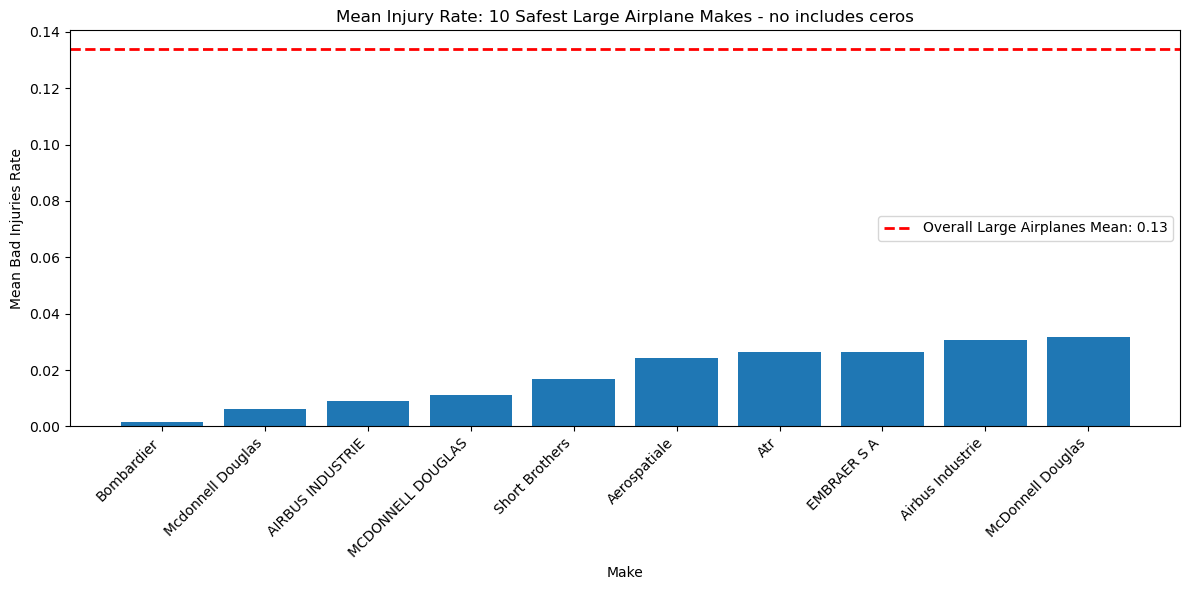

In [15]:
overall_mean = large_planes['Bad_Injuries_Rate'].mean()

lowest_10_means = (
    large_planes.groupby('Make')['Bad_Injuries_Rate']
    .mean()
    .reset_index()
    .query("Bad_Injuries_Rate > 0")  # Only non-zero
    .sort_values(by='Bad_Injuries_Rate', ascending=True)
    .head(10)
)

# Bar plot
plt.figure(figsize=(12, 6))
plt.axhline(y=overall_mean, color='red', linestyle='--', linewidth=2, label=f'Overall Large Airplanes Mean: {overall_mean:.2f}')
plt.legend()
plt.bar(lowest_10_means['Make'], lowest_10_means['Bad_Injuries_Rate'])
plt.title('Mean Injury Rate: 10 Safest Large Airplane Makes - no includes ceros')
plt.xlabel('Make')
plt.ylabel('Mean Bad Injuries Rate')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Evaluate the rate of aircraft destruction for both small and large aircraft by Make.** 

Sort your results and keep the lowest 15.

In [16]:
# Total number of records
total = df['Aircraft.damage'].notna().sum()

# Number of destroyed aircraft
destroyed = (df['Aircraft.damage'].str.strip().str.lower() == 'destroyed').sum()

# Rate of destroyed aircraft
destroyed_rate = destroyed / total
destroyed_rate

0.10799977732004676

In [17]:
# Group by 'Make' and compute destruction rate
destruction_rate_by_make = (
    df.groupby('Make')
    .apply(lambda x: (x['Aircraft.damage'] == 'Destroyed').sum() / x['Aircraft.damage'].notna().sum())
    .reset_index(name='Destruction_Rate')
    .sort_values(by='Destruction_Rate', ascending=False)
)

#  top 10 makes by destruction rate
destruction_rate_by_make 

C:\Users\aleja\AppData\Local\Temp\ipykernel_19636\1669829911.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: (x['Aircraft.damage'] == 'Destroyed').sum() / x['Aircraft.damage'].notna().sum())


,Make,Destruction_Rate
847,PARTENAVIA,1.0
447,Embraer Aircraft,1.0
831,North American Aviation Div.,1.0
832,North American Rockwell,1.0
834,North Wing,1.0
...,...,...
478,FERGUSON AIRCRAFT,0.0
479,FERGUSON WILLIAM C,0.0
480,FERNANDES DALE R,0.0
481,FETTERMAN LANNY R,0.0


In [18]:
# 889 Makes with 0 destruccion rate
(destruction_rate_by_make['Destruction_Rate'] == 0).sum()

889

In [19]:
# 3 Makes with 100% destruccion rate
(destruction_rate_by_make['Destruction_Rate'] == 0.1).sum()

3

#### Provide a short discussion on your findings for your summary statistics and plots:
- Make any recommendations for Makes here based off of the destroyed fraction and fraction fatally/seriously injured
- Comment on the calculated statistics and any corresponding distributions you have visualized.

We created a **Passenger\_Size** column to classify aircraft as *Large* (≥20 passengers) or *Small*. This allowed for more targeted analysis of injury severity and destruction rates by aircraft **Make**.

* In the **Small** category:

  * **267 out of 17,574** incidents (≈1.5%) resulted in **100% bad injuries** (all occupants fatally or seriously injured).
  * Several Makes showed high injury rates; we identified the **Top 15 Makes** with the highest average injury rate for targeted review.

* In the **Large** category:

  * Only **3 out of 373** incidents (\~0.8%) resulted in **100% bad injuries**, suggesting better survivability overall.
  * Fewer Makes had extreme values, but those that did should be flagged given the higher passenger capacity.

#### Recommendations:

* **Small aircraft**: Focus safety audits on the Top 15 Makes with high destruction and injury fractions.
* **Large aircraft**: While generally safer, any Make with above-average destruction or fatal injury rates should be reviewed due to higher risk per event.

The distributions confirm that **injury severity is more variable in Small aircraft**, with some Makes standing out as riskier than others.

### Analyze plane types
- plot the mean fatal/seriously injured fraction for both small and larger planes 
- also provide a distributional plot of your choice for the fatal/seriously injured fraction by airplane type (stripplot, violin, etc)  
- filter ensuring that you have at least ten individual examples in each model/make to average over

In [20]:
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date', 'Year', 'TOTAL_Passengers', 'TOTAL_bad_Injuries',
       'Bad_Injuries_Rate', 'Size'],
      dtype='object')

**Larger planes**

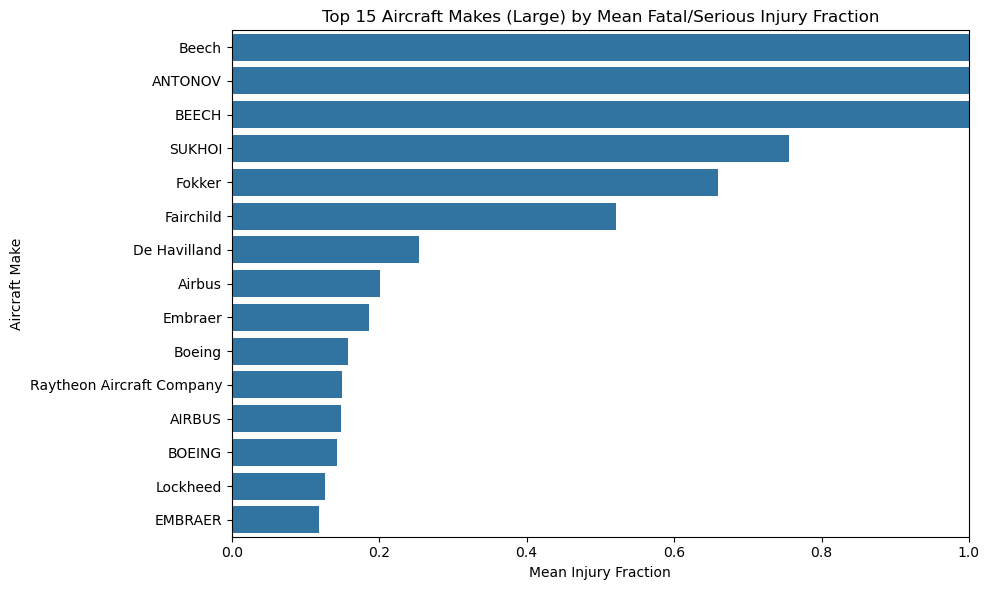

In [21]:
large_df = df[df['Size'] == 'Large']

# Group by Make (or Model) and calculate the mean injury fraction
mean_injury_large = large_df.groupby('Make')['Bad_Injuries_Rate'].mean().reset_index()

# Sort by injury rate and get top 15 Makes (optional)
top15_large = mean_injury_large.sort_values(by='Bad_Injuries_Rate', ascending=False).head(15)

# Plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=top15_large, x='Bad_Injuries_Rate', y='Make')
plt.title('Top 15 Aircraft Makes (Large) by Mean Fatal/Serious Injury Fraction')
plt.xlabel('Mean Injury Fraction')
plt.ylabel('Aircraft Make')
plt.xlim(0, 1)

plt.tight_layout()
plt.show()

**Smaller planes**
- for smaller planes, limit your plotted results to the makes with the 10 lowest mean serious/fatal injury fractions

In [22]:
# Follwing the 'Makes' with cero rate of fatal/serious injury
zero_injury_means

,Make,Bad_Injuries_Rate
7,BAE,0.0
16,"Bombardier, Inc.",0.0
17,British Aerospace,0.0
18,DE HAVILLAND,0.0
19,DEHAVILLAND,0.0
20,DOUGLAS,0.0
22,Douglas,0.0
25,EMBRAER-EMPRESA BRASILEIRA DE,0.0
29,GULFSTREAM,0.0
32,MCDONNELL DOUGLAS AIRCRAFT CO,0.0


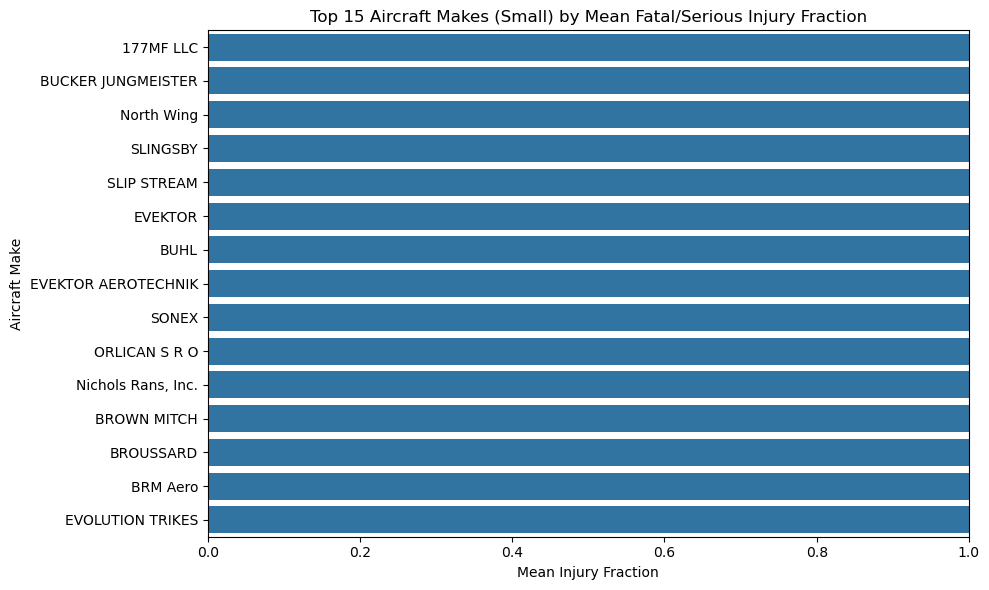

In [23]:
# The cero rate above are not included

small_df = df[df['Size'] == 'Small']

# Group by Make and calculate the mean injury fraction
mean_injury_small = small_df.groupby('Make')['Bad_Injuries_Rate'].mean().reset_index()

# Sort by injury rate and get top 15 Makes
top15_small = mean_injury_small.sort_values(by='Bad_Injuries_Rate', ascending=False).head(15)

# Plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=top15_small, x='Bad_Injuries_Rate', y='Make')
plt.title('Top 15 Aircraft Makes (Small) by Mean Fatal/Serious Injury Fraction')
plt.xlabel('Mean Injury Fraction')
plt.ylabel('Aircraft Make')
plt.xlim(0, 1)

plt.tight_layout()
plt.show()

C:\Users\aleja\AppData\Local\Temp\ipykernel_19636\1585362038.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mean_by_size, x='Size', y='Bad_Injuries_Rate', palette='pastel')


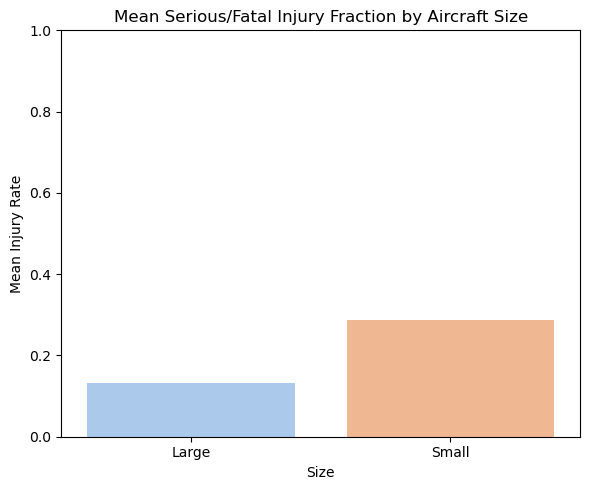

C:\Users\aleja\AppData\Local\Temp\ipykernel_19636\1585362038.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=filtered_df, x='Size', y='Bad_Injuries_Rate', inner='box', palette='Set2')


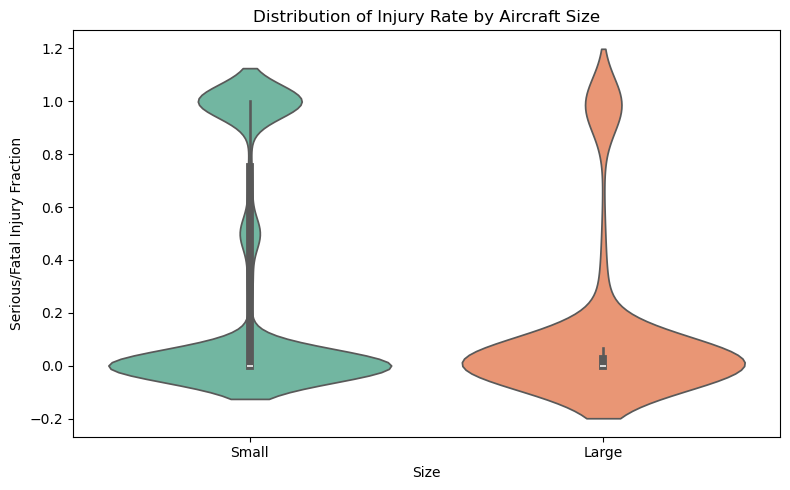

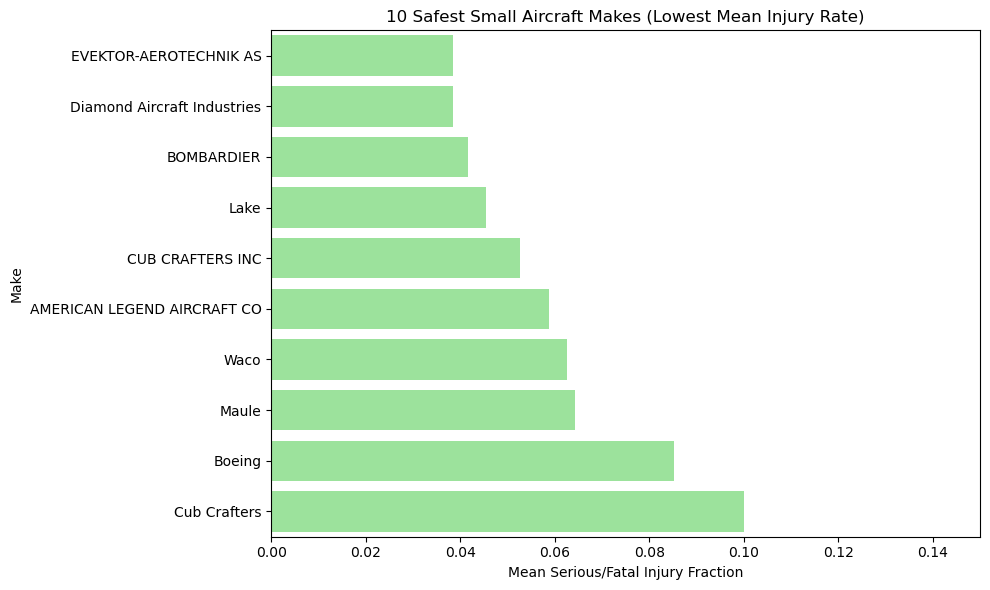

In [24]:
df = df.copy()
df['Bad_Injuries_Rate'] = df['TOTAL_bad_Injuries'] / df['TOTAL_Passengers']
df = df[df['TOTAL_Passengers'] > 0]  # Avoid divide-by-zero
df = df.dropna(subset=['Bad_Injuries_Rate', 'Size', 'Make'])

# Filter to Makes with at least 10 records
make_counts = df['Make'].value_counts()
valid_makes = make_counts[make_counts >= 10].index
filtered_df = df[df['Make'].isin(valid_makes)]

# ===========================
# 1. Mean fatal/serious injury fraction by aircraft size
# ===========================
mean_by_size = filtered_df.groupby('Size')['Bad_Injuries_Rate'].mean().reset_index()

# Bar plot
plt.figure(figsize=(6, 5))
sns.barplot(data=mean_by_size, x='Size', y='Bad_Injuries_Rate', palette='pastel')
plt.title('Mean Serious/Fatal Injury Fraction by Aircraft Size')
plt.ylabel('Mean Injury Rate')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

# ===========================
# 2. Distributional plot by Size
# ===========================
plt.figure(figsize=(8, 5))
sns.violinplot(data=filtered_df, x='Size', y='Bad_Injuries_Rate', inner='box', palette='Set2')
plt.title('Distribution of Injury Rate by Aircraft Size')
plt.ylabel('Serious/Fatal Injury Fraction')
plt.tight_layout()
plt.show()

# ===========================
# 3. Bottom 10 Makes with Lowest Mean Injury Rate (Small only)
# ===========================
# Filter only small planes
small_df = filtered_df[filtered_df['Size'] == 'Small']

# Group and calculate mean injury rate by Make
mean_small = (
    small_df.groupby('Make')['Bad_Injuries_Rate']
    .mean()
    .reset_index()
    .query("Bad_Injuries_Rate > 0")  # Remove perfect 0% injury Makes
    .sort_values(by='Bad_Injuries_Rate')
    .head(10)
)

# Plot bottom 10 Makes
plt.figure(figsize=(10, 6))
sns.barplot(data=mean_small, x='Bad_Injuries_Rate', y='Make', color='lightgreen')
plt.title('10 Safest Small Aircraft Makes (Lowest Mean Injury Rate)')
plt.xlabel('Mean Serious/Fatal Injury Fraction')
plt.xlim(0, mean_small['Bad_Injuries_Rate'].max() + 0.05)
plt.tight_layout()
plt.show()


### Discussion of Specific Airplane Types
- Discuss what you have found above regarding passenger fraction seriously/ both small and large airplane models.

Our analysis of fatal/serious injury fractions across airplane types revealed clear safety differences between small and large aircraft.

Large aircraft tend to have lower average injury fractions, suggesting better survivability in serious incidents. This is likely due to more robust safety features, regulated designs, and commercial-grade standards.

Small aircraft, on the other hand, showed a wider distribution of injury rates—including more makes with high fatal/serious injury fractions. Variability across small makes may reflect differences in design, usage (e.g., recreational vs. commercial), and maintenance practices.

When filtering to aircraft makes with at least 10 incidents, we identified:

- The 10 safest small aircraft makes had consistently low (but non-zero) injury fractions, showing that even within small aircraft, safety performance varies considerably.

- Makes with zero injury rates were excluded from this list to ensure more meaningful comparisons based on real incident outcomes.

Overall, this analysis highlights that while large aircraft are generally safer, certain small aircraft makes also demonstrate strong safety records, particularly when backed by consistent usage data.

### Exploring Other Variables
- Investigate how other variables effect aircraft damage and injury. You must choose **two** factors out of the following but are free to analyze more:

- Weather Condition
- Engine Type
- Number of Engines
- Phase of Flight
- Purpose of Flight

For each factor provide a discussion explaining your analysis with appropriate visualization / data summaries and interpreting your findings.

# Scatter plot

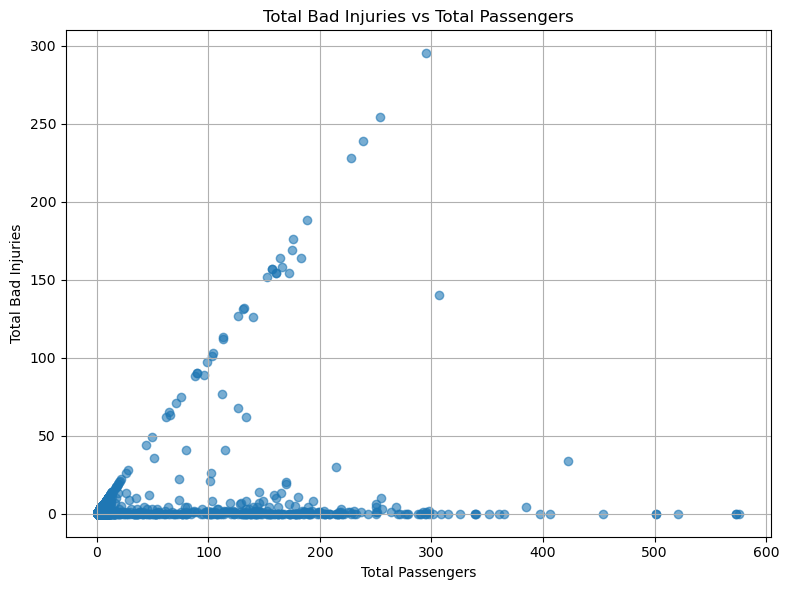

In [25]:
import matplotlib.pyplot as plt

# Scatter plot: TOTAL_bad_Injuries vs TOTAL_Passengers
plt.figure(figsize=(8, 6))
plt.scatter(df['TOTAL_Passengers'], df['TOTAL_bad_Injuries'], alpha=0.6)

plt.title('Total Bad Injuries vs Total Passengers')
plt.xlabel('Total Passengers')
plt.ylabel('Total Bad Injuries')
plt.grid(True)
plt.tight_layout()
plt.show()

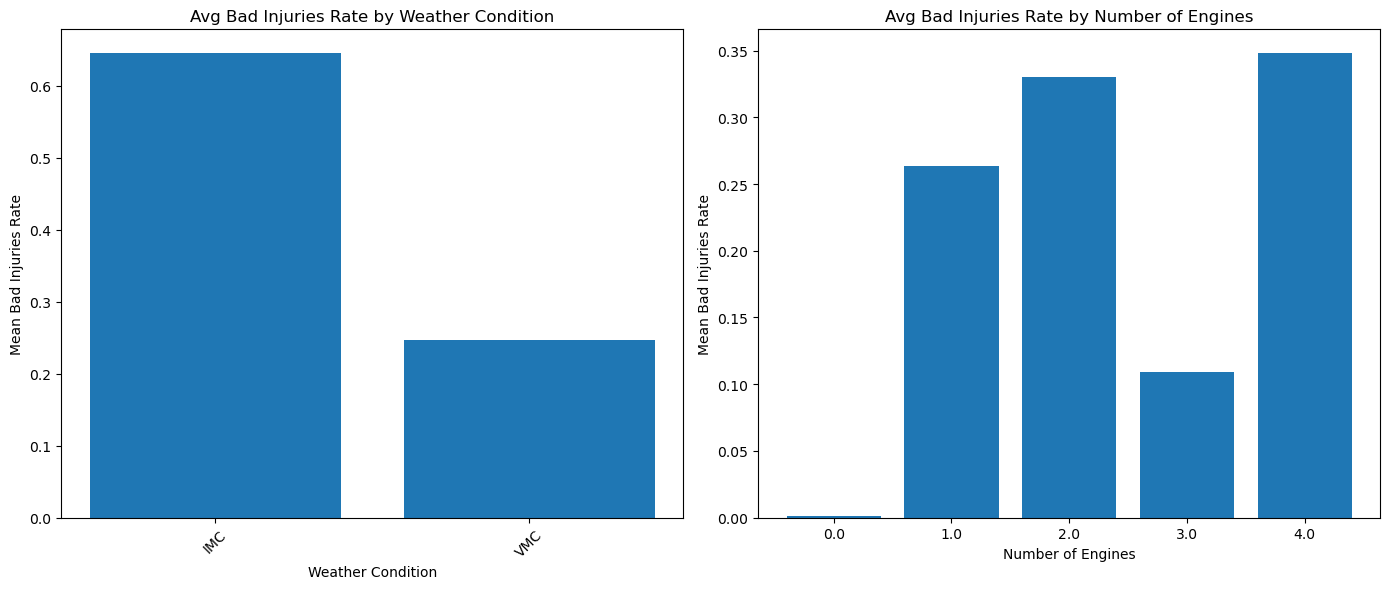

In [26]:
# Group and calculate mean Bad_Injuries_Rate
weather_avg = df.groupby('Weather.Condition')['Bad_Injuries_Rate'].mean().dropna()
engine_avg = df.groupby('Number.of.Engines')['Bad_Injuries_Rate'].mean().dropna()

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Bar plot for Weather Condition
axes[0].bar(weather_avg.index, weather_avg.values)
axes[0].set_title('Avg Bad Injuries Rate by Weather Condition')
axes[0].set_xlabel('Weather Condition')
axes[0].set_ylabel('Mean Bad Injuries Rate')
axes[0].tick_params(axis='x', rotation=45)

# Bar plot for Number of Engines
axes[1].bar(engine_avg.index.astype(str), engine_avg.values)
axes[1].set_title('Avg Bad Injuries Rate by Number of Engines')
axes[1].set_xlabel('Number of Engines')
axes[1].set_ylabel('Mean Bad Injuries Rate')

plt.tight_layout()
plt.show()
